In [1]:
import geoai
import requests
import rasterio
import numpy as np

In [2]:
print(dir(geoai.common))

['Any', 'Callable', 'DataLoader', 'Dict', 'Iterable', 'List', 'Optional', 'RandomGeoSampler', 'RasterDataset', 'Tuple', 'Type', 'Union', 'Units', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calc_stats', 'indices', 'np', 'os', 'plot_batch', 'plot_images', 'plot_masks', 'plt', 'stack_samples', 'torch', 'unbind_samples', 'utils', 'viz_image', 'viz_raster']


In [3]:
print(dir(geoai.geoai))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calc_stats', 'plot_batch', 'viz_image', 'viz_raster']


In [4]:
print(dir(geoai.common.utils))

['Any', 'BoundingBox', 'DependencyNotFoundError', 'Executable', 'Iterable', 'Iterator', 'Mapping', 'MutableMapping', 'Path', 'Sequence', 'Tensor', 'TypeAlias', '__all__', '__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_dict_list_to_list_dict', '_list_dict_to_dict_list', 'annotations', 'array_to_tensor', 'cast', 'check_integrity', 'collections', 'concat_samples', 'contextlib', 'dataclass', 'datetime', 'disambiguate_timestamp', 'download_and_extract_archive', 'download_url', 'draw_segmentation_masks', 'draw_semantic_segmentation_masks', 'extract_archive', 'importlib', 'lazy_import', 'merge_samples', 'np', 'os', 'overload', 'path_is_vsi', 'percentile_normalization', 'rasterio', 'rasterio_loader', 'rgb_to_mask', 'shutil', 'sort_sentinel2_bands', 'stack_samples', 'subprocess', 'sys', 'timedelta', 'torch', 'unbind_samples', 'which', 'working_dir']


In [5]:
print(dir(geoai))

['__author__', '__builtins__', '__cached__', '__doc__', '__email__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'calc_stats', 'common', 'geoai', 'plot_batch', 'viz_image', 'viz_raster']


In [6]:
utils = geoai.common.utils  # Assign to a variable (The error means that geoai.common is not a proper package, so it cannot be imported as a submodule. However, dir(geoai.common.utils) )

naip_url = ( "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif")
masks_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_building_masks.tif" #mask for building

## my code

In [7]:
def download_file(url, filename):
    response = requests.get(url, stream=True)
    response.raise_for_status()
    with open(filename, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    return filename

In [8]:
# Save the files manually
masks_path = download_file(masks_url, "masks.tif")
naip_path = download_file(naip_url, "naip.tif")

print("Downloaded files:", masks_path, naip_path)


Downloaded files: masks.tif naip.tif


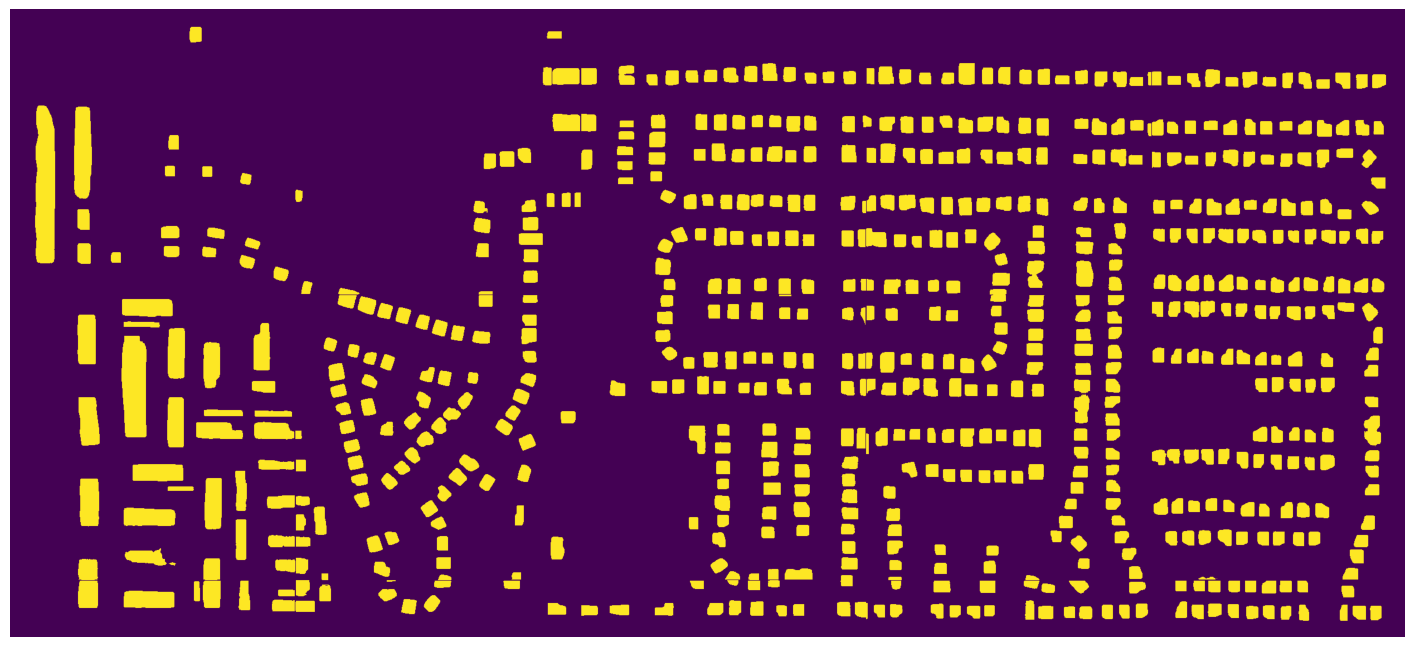

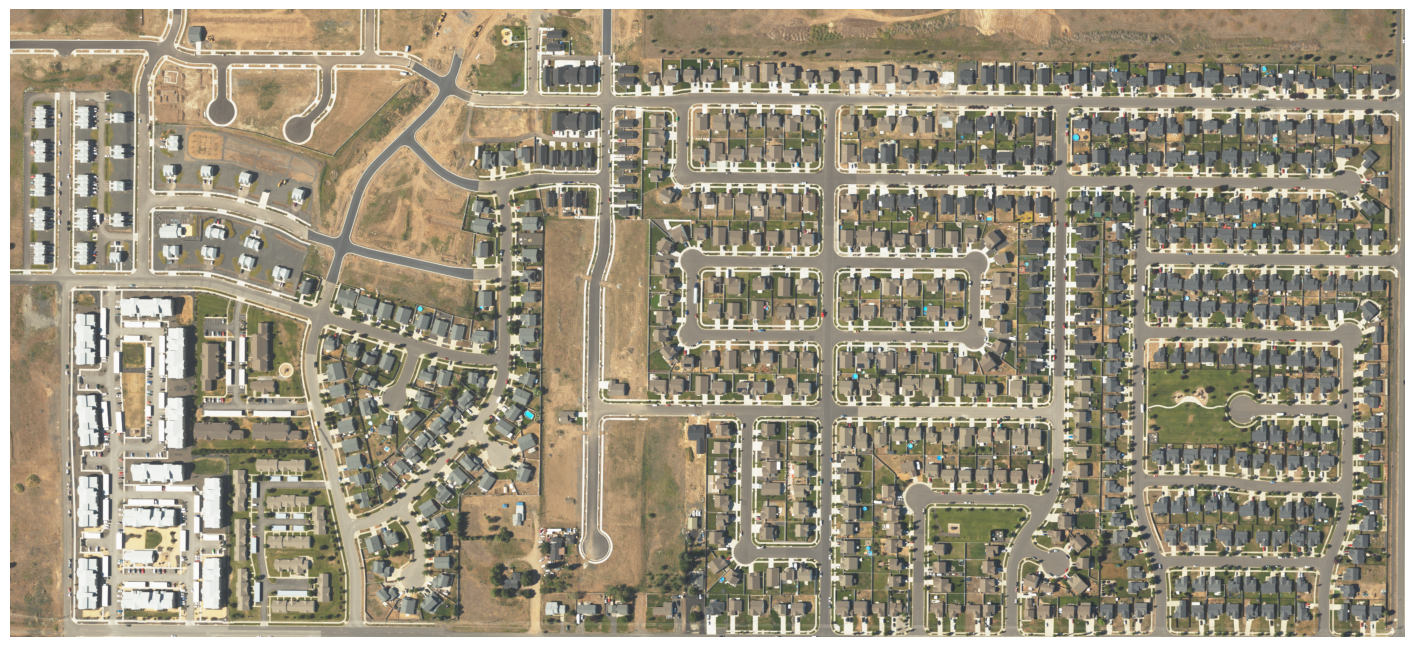

In [9]:
# Read the TIFF file as an array
def load_tiff_image(image_path):
    with rasterio.open(image_path) as src:
        return src.read().transpose((1, 2, 0))  # Convert from (bands, height, width) to (height, width, bands)

# Load the images
masks_image = load_tiff_image(masks_path)
naip_image = load_tiff_image(naip_path)

# Visualize with geoai
geoai.viz_image(masks_image, figsize=(18, 10))
geoai.viz_image(naip_image, figsize=(18, 10))

In [10]:
geoai.create_split_map(
    left_layer=masks_url,
    right_layer=naip_url,
    left_label="Building Masks",
    right_label="NAIP Imagery",
    left_args={
        "colormap": {"255": "#0000ff"},
        "opacity": 0.5,
    },
    basemap=naip_url,
)

AttributeError: module 'geoai' has no attribute 'create_split_map'